In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as ipyd
from libs import gif, nb_utils

Start an interactive session:

In [2]:
sess = tf.InteractiveSession()

Now we'll load Google's Inception model, which is a pretrained network for classification built using the ImageNet database.  I've included some helper functions for getting this model loaded and setup w/ Tensorflow.

In [3]:
from libs import inception
net = inception.get_inception_model()

We'll now get the graph from the storage container, and tell tensorflow to use this as its own graph.  This will add all the computations we need to compute the entire deep net, as well as all of the pre-trained parameters.

In [4]:
tf.import_graph_def(net['graph_def'], name='inception')

<TODO: visual of graph>

Let's have a look at the graph:

In [5]:
g = tf.get_default_graph()
names = [op.name for op in g.get_operations()]

The input to the graph is stored in the first tensor output, and the probability of the 1000 possible objects is in the last layer:

In [6]:
input_name = names[0] + ':0'
x = g.get_tensor_by_name(input_name)

In [7]:
softmax = g.get_tensor_by_name(names[-1] + ':0')

다음은 그레디언트 벡터를 계산하는 코드임

In [8]:
gradient = tf.gradients(tf.reduce_max(softmax, 1), x)

In [9]:
def normalize(img, s=0.1):
    '''Normalize the image range for visualization'''
    z = img / np.std(img)
    return np.uint8(np.clip(
        (z - z.mean()) / max(z.std(), 1e-4) * s + 0.5,
        0, 1) * 255)

In [10]:
import os        # os에 관계된 라이브러리들을 import한다.  
dirname = 'temp'   # 디렉토리명(dirname)을 'IU'로 한다. 

# dirname이라는 디렉토리 안에 있는 모든 파일을 filenames에 저장한다. 
filenames = [os.path.join(dirname, fname)   # 밑에서 얻은 파일들을 [](배열)안에 추가 
             for fname in os.listdir(dirname)]   #dirname내의 모든 파일명을 얻는다.

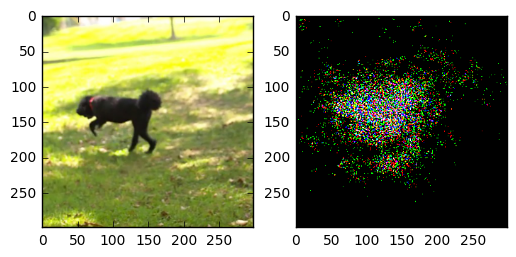

In [11]:
img = plt.imread(filenames[1])
img2 = inception.preprocess(img)
img_4d = img2[np.newaxis]
test_res =  sess.run(gradient, feed_dict={x: img_4d})
test_res2 = test_res[0]

fig, axs = plt.subplots(1, 2)
axs[0].imshow(inception.deprocess(img2))
axs[1].imshow(np.abs(np.uint8(test_res2[0]*2000)))

In [12]:
test_result = np.squeeze(test_res2)
test_result2 = np.zeros((299,299))

In [13]:
for i in range(299):
    for j in range(299):
        test_result2[i][j] =np.sqrt(pow(test_result[i][j][0],2)
       +pow(test_result[i][j][1],2)+pow(test_result[i][j][2],2));

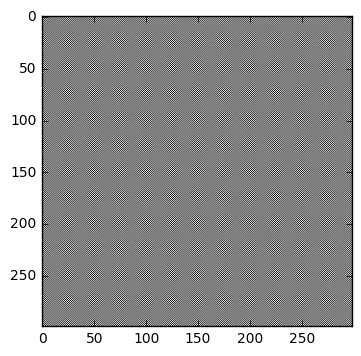

In [14]:
psi = np.zeros((299,299))
for i in range(299):
    for j in range(299):
        if ((i+j) % 2 ==0):
            psi[i][j]=1
        else:
            psi[i][j]=-1

plt.imshow(psi,cmap='gray')

In [15]:
for time in range(200):

    ave_plus = 0
    ave_minus = 0
    number_plus = 0
    number_minus = 0   

    for i in range(299):
        for j in range(299):
            if(psi[i][j]>0): 
                ave_plus += test_result2[i][j]
                number_plus +=1
            else:     
                ave_minus += test_result2[i][j]
                number_minus +=1
                
    ave_plus = ave_plus/(number_plus+0.0000001)
    ave_minus = ave_minus/(number_minus+0.0000001)
                
    for i in range(1,298):
        for j in range(1,298):
            laplacian = (psi[i][j-1]+psi[i][j+1]+psi[i+1][j]+psi[i-1][j])-4*psi[i][j]
            if ( abs(test_result2[i][j]-ave_plus) >  abs(test_result2[i][j]-ave_minus)):
                psi[i][j] =  psi[i][j] -0.02 + 0.02*laplacian
            else:
                psi[i][j] =  psi[i][j] +0.02 + 0.02*laplacian
            
            

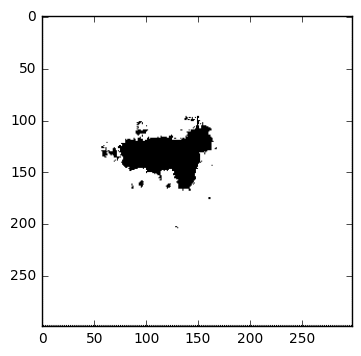

In [16]:
test_result3 = np.zeros((299,299))

for i in range(299):
    for j in range(299):
        if psi[i][j]> 0 :
            test_result3[i][j]=100
        else:
            test_result3[i][j]=0
            
plt.imshow(test_result3 ,cmap='gray')

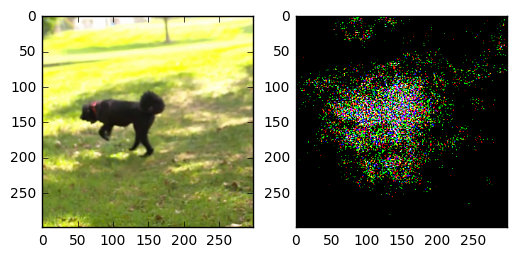

In [17]:
img = plt.imread(filenames[2])
img2 = inception.preprocess(img)
img_4d = img2[np.newaxis]
test_res =  sess.run(gradient, feed_dict={x: img_4d})
test_res2 = test_res[0]

fig, axs = plt.subplots(1, 2)
axs[0].imshow(inception.deprocess(img2))
axs[1].imshow(np.abs(np.uint8(test_res2[0]*1800)))

In [18]:
test_result = np.squeeze(test_res2)
test_result2 = np.zeros((299,299))

In [19]:
for i in range(299):
    for j in range(299):
        test_result2[i][j] =np.sqrt(pow(test_result[i][j][0],2)
       +pow(test_result[i][j][1],2)+pow(test_result[i][j][2],2));

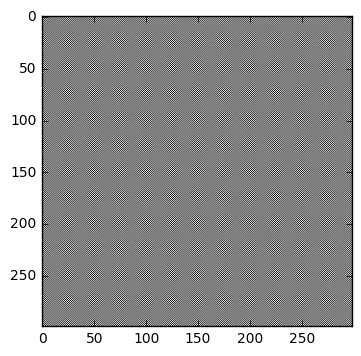

In [20]:
psi2 = np.zeros((299,299))
for i in range(299):
    for j in range(299):
        if ((i+j) % 2 ==0):
            psi2[i][j]=1
        else:
            psi2[i][j]=-1

plt.imshow(psi2,cmap='gray')

In [21]:
for time in range(200):

    ave_plus = 0
    ave_minus = 0
    number_plus = 0
    number_minus = 0   

    for i in range(299):
        for j in range(299):
            if(psi2[i][j]>0): 
                ave_plus += test_result2[i][j]
                number_plus +=1
            else:     
                ave_minus += test_result2[i][j]
                number_minus +=1
                
    ave_plus = ave_plus/(number_plus+0.0000001)
    ave_minus = ave_minus/(number_minus+0.0000001)
                
    for i in range(1,298):
        for j in range(1,298):
            laplacian = (psi2[i][j-1]+psi2[i][j+1]+psi2[i+1][j]+psi2[i-1][j])-4*psi2[i][j]
            if ( abs(test_result2[i][j]-ave_plus) >  abs(test_result2[i][j]-ave_minus)):
                psi2[i][j] =  psi2[i][j] -0.02 + 0.02*laplacian
            else:
                psi2[i][j] =  psi2[i][j] +0.02 + 0.02*laplacian

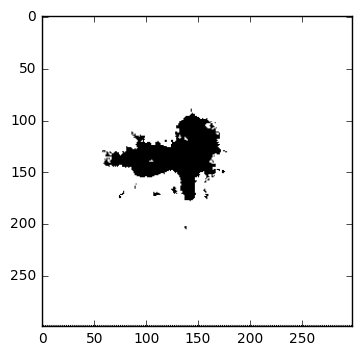

In [22]:
test_result3 = np.zeros((299,299))

for i in range(299):
    for j in range(299):
        if psi2[i][j]> 0 :
            test_result3[i][j]=100
        else:
            test_result3[i][j]=0
            
plt.imshow(test_result3 ,cmap='gray')

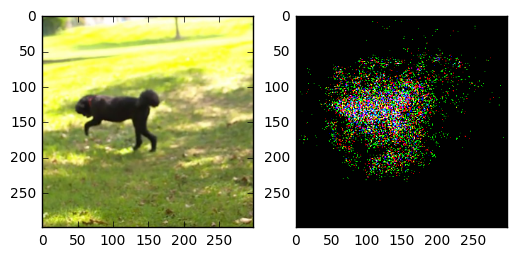

In [23]:
img = plt.imread(filenames[3])
img2 = inception.preprocess(img)
img_4d = img2[np.newaxis]
test_res =  sess.run(gradient, feed_dict={x: img_4d})
test_res2 = test_res[0]

fig, axs = plt.subplots(1, 2)
axs[0].imshow(inception.deprocess(img2))
axs[1].imshow(np.abs(np.uint8(test_res2[0]*1000)))

In [24]:
test_result = np.squeeze(test_res2)
test_result2 = np.zeros((299,299))

In [25]:
for i in range(299):
    for j in range(299):
        test_result2[i][j] =np.sqrt(pow(test_result[i][j][0],2)
       +pow(test_result[i][j][1],2)+pow(test_result[i][j][2],2));
#        test_result2[i][j] =np.log(np.sqrt(pow(test_result[i][j][0],2)
#        +pow(test_result[i][j][1],2)+pow(test_result[i][j][2],2))+1);

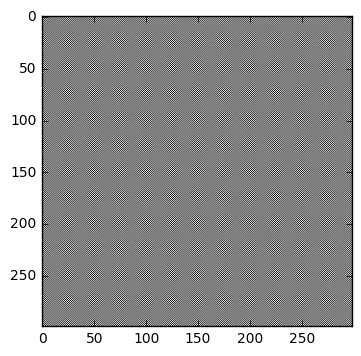

In [26]:
# bimodal segmentation
psi3 = np.zeros((299,299))
for i in range(299):
    for j in range(299):
        if ((i+j) % 2 ==0):
            psi3[i][j]=1
        else:
            psi3[i][j]=-1

plt.imshow(psi3,cmap='gray')

In [27]:
for time in range(200):

    ave_plus = 0
    ave_minus = 0
    number_plus = 0
    number_minus = 0   

    for i in range(299):
        for j in range(299):
            if(psi3[i][j]>0): 
                ave_plus += test_result2[i][j]
                number_plus +=1
            else:     
                ave_minus += test_result2[i][j]
                number_minus +=1
                
    ave_plus = ave_plus/(number_plus+0.0000001)
    ave_minus = ave_minus/(number_minus+0.0000001)
                
    for i in range(1,298):
        for j in range(1,298):
            laplacian = (psi3[i][j-1]+psi3[i][j+1]+psi3[i+1][j]+psi3[i-1][j])-4*psi3[i][j]
            if ( abs(test_result2[i][j]-ave_plus) >  abs(test_result2[i][j]-ave_minus)):
                psi3[i][j] =  psi3[i][j] -0.02 + 0.02*laplacian
            else:
                psi3[i][j] =  psi3[i][j] +0.02 + 0.02*laplacian
            
            

In [28]:
#for time in range(200):
    
#   for i in range(1,298):
#      for j in range(1,298):
#         laplacian = (psi[i][j-1]+psi[i][j+1]+psi[i+1][j]+psi[i-1][j])-4*psi[i][j]
#        psi[i][j] += 0.1*laplacian


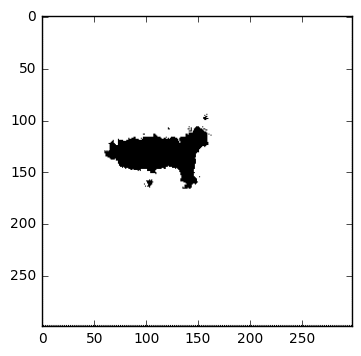

In [29]:
test_result3 = np.zeros((299,299))

for i in range(299):
    for j in range(299):
        if psi3[i][j]> 0 :
            test_result3[i][j]=100
        else:
            test_result3[i][j]=0
            
plt.imshow(test_result3 ,cmap='gray')

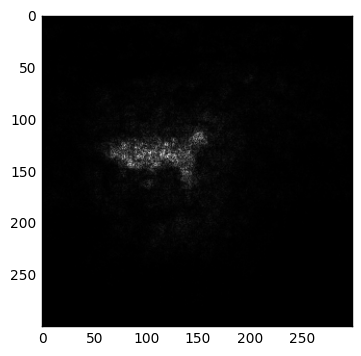

In [30]:
plt.imshow(abs(test_result2)*1000000,cmap='gray')

## Object Selectable Style Transfer
## 객체 선택 스타일 트랜스퍼

what to do....Install OpenCV for python and run it in IPython notebook.
